In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Part 1 - Univariate vizualisations

## Univariate plots:

> **bar charts**

> **histograms**

In [3]:
mafs = pd.read_csv('mafs.csv')

In [4]:
mafs.shape

(68, 17)

In [5]:
mafs.head()

,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Yes,Married,1,1,1,1,0,0,0,0
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Yes,Married,1,1,1,1,0,0,0,0
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Yes,Divorced,1,1,1,1,0,0,0,0
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Yes,Divorced,1,1,1,1,0,0,0,0
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,No,Divorced,1,1,1,1,0,0,0,0


BAR CHART:

In [6]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [7]:
base_color = sb.color_palette()[0]

In [8]:
season_order = mafs['Season'].value_counts().index  # order in descending order of count

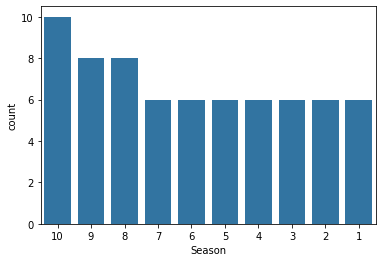

In [9]:
sb.countplot(data = mafs, x = 'Season', color = base_color, order = season_order);  # bar chart

HISTOGRAM:

In [10]:
pokemon = pd.read_csv('pokemon.csv')

pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


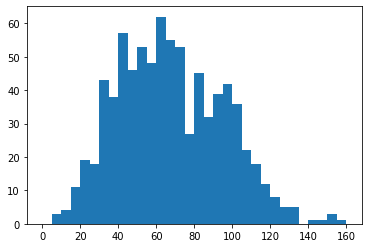

In [11]:
bins = np.arange(0, pokemon['speed'].max() + 5, 5)    # step size of 5; we add 5 to max because else max is excluded

plt.hist(data = pokemon, x = 'speed', bins = bins);

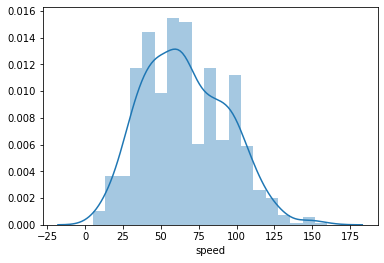

In [12]:
sb.distplot(pokemon['speed'])

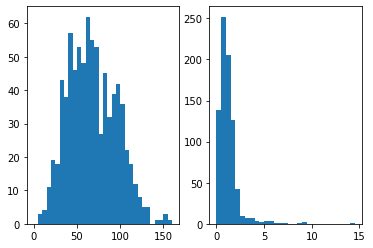

In [13]:
plt.figure()

plt.subplot(1,2,1)
bins = np.arange(0, pokemon['speed'].max() + 5, 5)   
plt.hist(data = pokemon, x = 'speed', bins = bins);

plt.subplot(1,2,2)
bins = np.arange(0, pokemon['height'].max() + 0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bins);

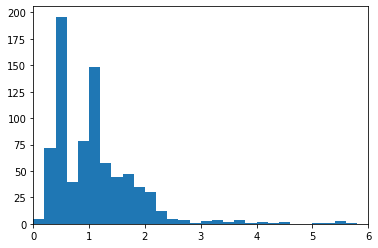

In [14]:
bins = np.arange(0, pokemon['height'].max() + 0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins);
plt.xlim((0,6));

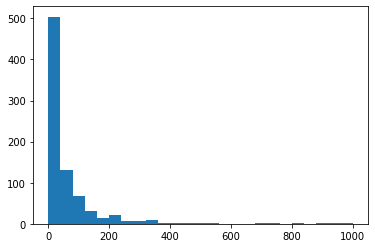

In [15]:
bins = np.arange(0, pokemon['weight'].max() + 40, 40)

plt.hist(data = pokemon, x = 'weight', bins = bins);

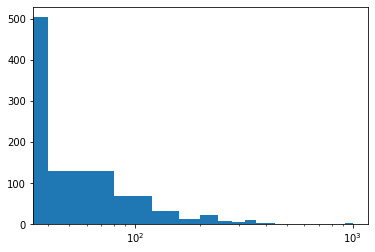

In [16]:
# using a logarithmic transform 

bins = np.arange(0, pokemon['weight'].max() + 40, 40)

plt.hist(data = pokemon, x = 'weight', bins = bins);

plt.xscale('log');  # default is 'linear'

> plot above looks odd: let's do some changes:

### Modifying the bins:

In [17]:
np.log10(pokemon['weight'].describe())  # look at log10 of min and max values

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

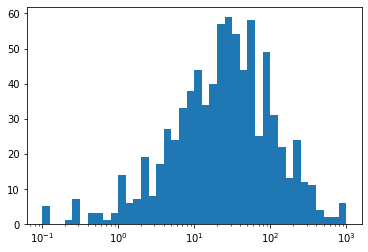

In [18]:
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)

plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');  # default is 'linear'

### Modify the x tickmarks so that they're more interpretable:

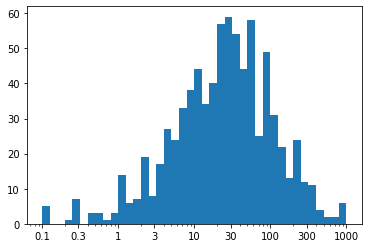

In [19]:
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]

bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log'); 

plt.xticks(ticks, labels);

# Part 2 - Bivariate vizualisations: viz of 2 variables

## Bivariate plots:

> **scatterplots** for quantitative variable vs quantitative variable

> **violin plots** for quantitative variable vs qualitative variable

> **clustered bar charts** for qualitative variable vs qualitative variable

### Scatterplots and correlation:

In [20]:
fuel_econ = pd.read_csv('fuel_econ.csv')

In [21]:
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


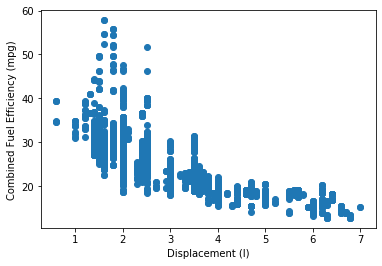

In [22]:
# using matplotlib

plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Efficiency (mpg)');

> Observation: suggests NEGATIVE correlation between engine size and fuel efficiency

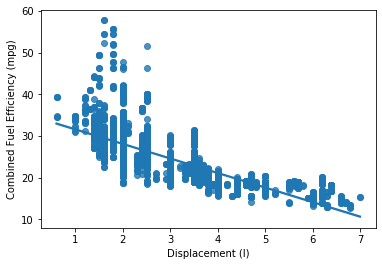

In [23]:
# using seaborn:

sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');    # to remove regression line: add arg 'fit_reg = False'
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Efficiency (mpg)');

### Overplotting, transparency and jitter:

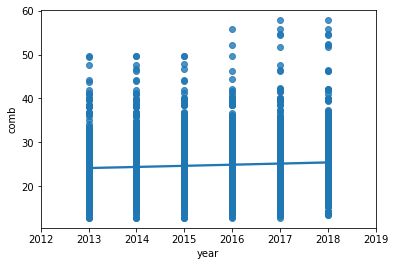

In [24]:
# 1. not very intepretable

sb.regplot(data = fuel_econ, x = 'year', y = 'comb');
plt.xlim(2012, 2019, 1);

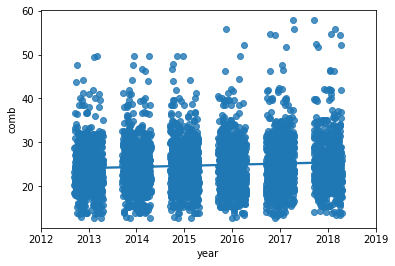

In [25]:
# 2. adding jitter

sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3);
plt.xlim(2012, 2019, 1);

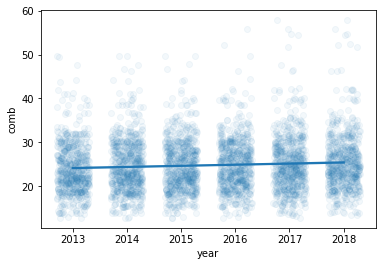

In [26]:
# 3. adding jitter AND transparency parameter

sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3, scatter_kws = {'alpha':1/20});

### Heat maps:  or '2D histograms (looked from above)'

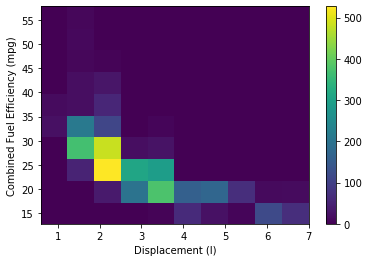

In [27]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb');
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Efficiency (mpg)');

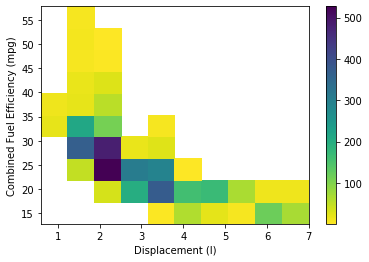

In [28]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', 
           cmin = 0.5, cmap = 'viridis_r');   # default color map = 'viridis'; viridis_r = reverse color map
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Efficiency (mpg)');

> any rectangular area ('cell') count below 0.5 is set to 'white' color with `cmin = 0.5`
That means only cells containing at least 1 point will be colored. 

> changing color of the map: default color is viridis (see heat map 1: darker regions = lower values), and `viridis_r` is the reverse of this default (darker regions = higher values)

Changing the bins for variable x and variable y:

In [29]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


> let's set bin size of 0.3 for displ variable (x) and of 3 for comb variable (y):

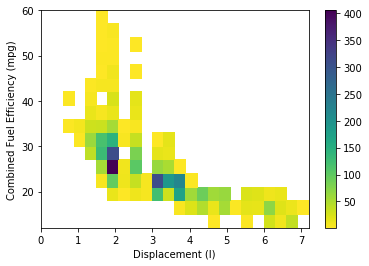

In [30]:
bins_x = np.arange(0, fuel_econ['displ'].max() + 0.3, 0.3)
bins_y = np.arange(12, fuel_econ['comb'].max() + 3, 3)


plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r', 
           bins = [bins_x, bins_y]);   
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Efficiency (mpg)');

### Violin Plots:

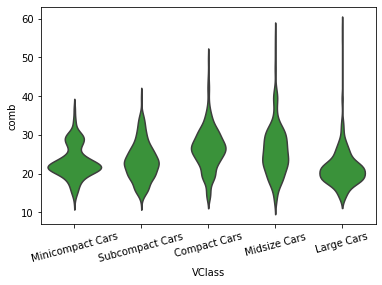

In [31]:
green = sb.color_palette()[2]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = green, inner = None, # True: miniature boxplots displayed
              order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars' ]);
plt.xticks(rotation = 15);

### Box Plots:

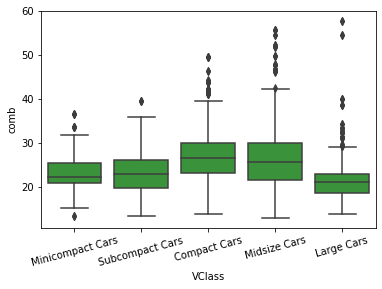

In [32]:
green = sb.color_palette()[2]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', color = green,
              order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars' ]);
plt.xticks(rotation = 15);

### Violin plots + Boxplots:

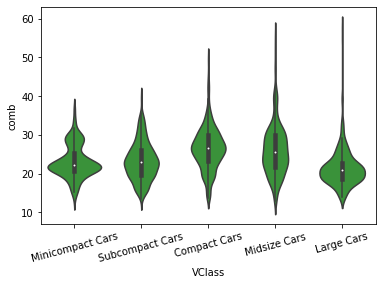

In [33]:
# 1
green = sb.color_palette()[2]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = green, 
              order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars' ]);
plt.xticks(rotation = 15);

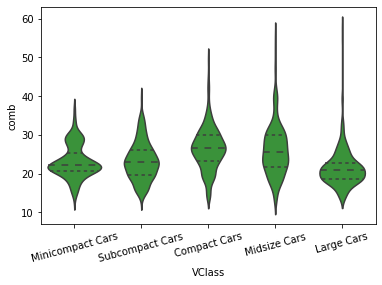

In [34]:
# 2
green = sb.color_palette()[2]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = green, inner = 'quartile',
              order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars' ]);
plt.xticks(rotation = 15);

### Clustered Bar Charts:

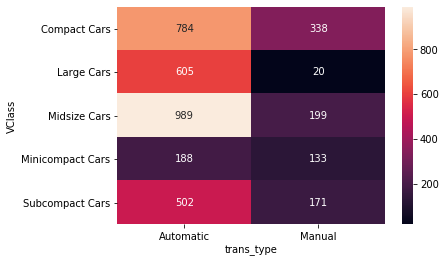

In [45]:
# First, look at this heat map:

fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x : x.split()[0])

ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')

# heat map
sb.heatmap(ct_counts, annot = True, fmt = 'd');

> not very informative.

Better visualisation (clustered bar chart):

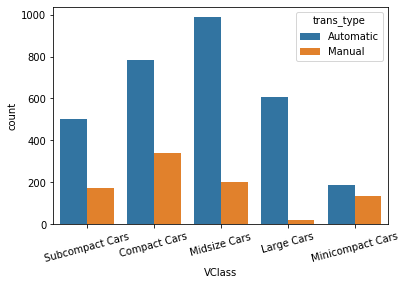

In [48]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');
plt.xticks(rotation = 15);

### Faceting:

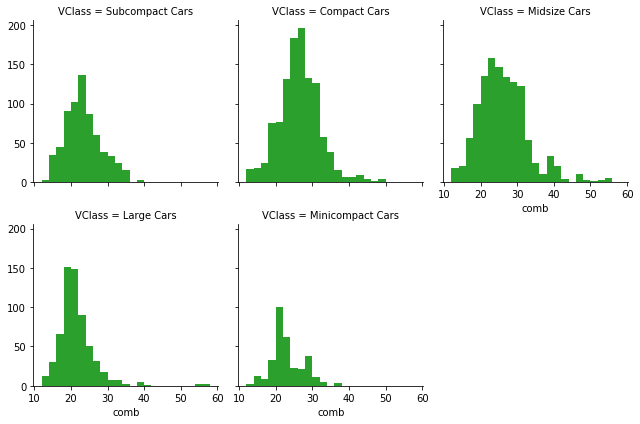

In [51]:
bins = np.arange(12, 58 + 2, 2)
green = sb.color_palette()[2]

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3);
g.map(plt.hist, 'comb', bins = bins, color = green);

### Adapting bar charts and histograms for use as bivariate plots:

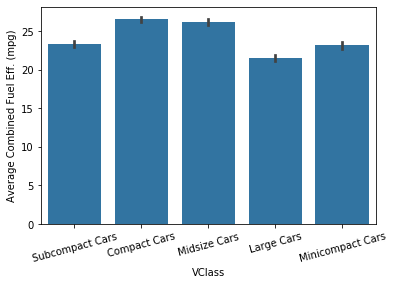

In [53]:
# adapting a bar plot

# with error bars (confidence intervals)
blue = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = blue);
plt.xticks(rotation = 15);
plt.ylabel('Average Combined Fuel Eff. (mpg)');

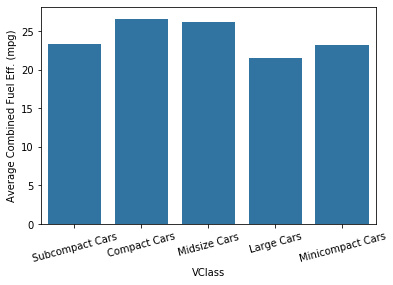

In [55]:
# without error bars
blue = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = blue,
           errwidth = 0);
plt.xticks(rotation = 15);
plt.ylabel('Average Combined Fuel Eff. (mpg)');

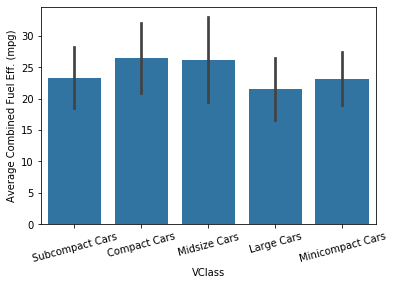

In [56]:
# error bars representing sd of the data points (confidence intervals 'ci')
blue = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = blue,
            ci = 'sd');
plt.xticks(rotation = 15);
plt.ylabel('Average Combined Fuel Eff. (mpg)');

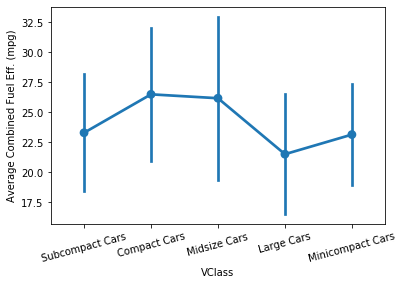

In [60]:
# if zero lower bound is not of interest: pointplot instead of barplot in seaborn

# points connected by a line in the point plot
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', 
             ci = 'sd');
plt.xticks(rotation = 15);
plt.ylabel('Average Combined Fuel Eff. (mpg)');

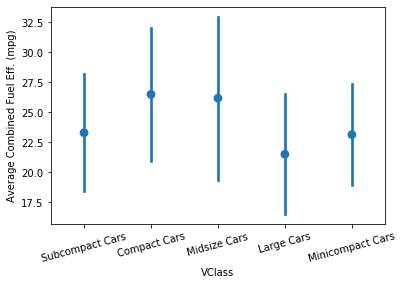

In [61]:
# points NOT connected by a line in the point plot
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', 
           ci = 'sd', linestyles = "");
plt.xticks(rotation = 15);
plt.ylabel('Average Combined Fuel Eff. (mpg)');

### Line plots:

In [64]:
# step 1

bins_edges = np.arange(0.6, 7 + 0.2, 0.2)
bins_center = bins_edges[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_edges, include_lowest = True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

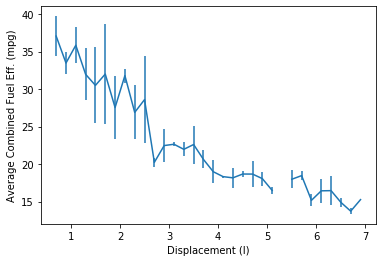

In [66]:
# step 2 - plotting

plt.errorbar(x = bins_center, y = comb_mean, yerr = comb_std)
plt.xlabel('Displacement (l)')
plt.ylabel('Average Combined Fuel Eff. (mpg)');